# Gradient descent
for some function $F(\mathbf{x}), \mathbf{x} \equiv (x_1,\cdots,x_n)$, we may minimize moving in the direction of the negative gradient $-\nabla F(\mathbf{x})$, i.e.
$$
\mathbf{x}_{k+1} =  \mathbf{x}_k -\gamma_k \nabla  F(\mathbf{x_k}),
$$
where $\gamma_k$ is the learning rate.

In [5]:
"""
Gradient descent optimization
"""

import numpy as np
def func(x: np.ndarray|float) -> np.ndarray|float:
  return 5 + 2*x + 7*x**2


def grad_func(x: np.ndarray|float) -> np.ndarray|float:
  return 2 + 14*x

learning_rate = 0.01
iterations_max = 1000
tolerance = 1e-5
#initial guess
guess = 4
guesses = [guess]
iteration = 0
while True:
  new_guess = guess - learning_rate*grad_func(guess)
  guesses.append(new_guess)
  change = new_guess - guess
  guess = new_guess
  iteration += 1
  if iteration > iterations_max or np.abs(change) < tolerance:
    break
print(f"final # of iterations: {iteration}")
print(f"tolerance met: {np.abs(change) < tolerance}")


final # of iterations: 74
tolerance met: True


# Gradient Descent with momentum
we alter Gradient Descent algorithm to include a momentum/memory term
$$
\mathbf{x}_{k+2} = \mathbf{x}_{k+1} + (\mathbf{x}_{k+1} - \mathbf{x}_k)\gamma - \gamma_k \nabla F(\mathbf{x}_{k+1}),
$$
where $\gamma$ is the momentum parameter.

In [103]:
"""
Gradient descent with momentum optimization
"""

import numpy as np
def func(x: np.ndarray|float) -> np.ndarray|float:
  return 5 + 2*x + 7*x**2


def grad_func(x: np.ndarray|float) -> np.ndarray|float:
  return 2 + 14*x

learning_rate = 0.01
momentum_parameter = 0.01
iterations_max = 1000
tolerance = 1e-5
#initial guess
guess = 4
guesses = [guess]
iteration = 0
change = 0
while True:
  new_guess = guess - learning_rate*grad_func(guess) + change*momentum_parameter
  guesses.append(new_guess)
  change = new_guess - guess
  guess = new_guess
  iteration += 1
  if iteration > iterations_max or np.abs(change) < tolerance:
    break
print(f"final # of iterations: {iteration}")
print(f"tolerance met: {np.abs(change) < tolerance}")
print("Final guess:", guess)
print("Final output:", func(guess))

final # of iterations: 73
tolerance met: True
Final guess: -0.14279748908250572
Final output: 4.857142882052867


# Stochastic gradient descent
for N data points $(\mathbf{x}_0, \mathbf{x}_1, \dots, \mathbf{x}_{n-1})$, we can parition into $M$ batches, e.g. for 10 datapoints we have $B_1 = (\mathbf{x}_1, \mathbf{x}_2),\dots, B_5 = (\mathbf{x}_9, \mathbf{x}_{10})$

In [252]:
import numpy as np

def func(x):
    return 5 + 2*x + 7*x**2

def grad_func(x):
    return 2 + 14*x

learning_rate = 0.05
epochs = 100
batch_size = 50

# Initial guess
guess = 4
guesses = [guess]

# Generate random input-output pairs and use them for SGD updates
for i in range(epochs):
    mini_batch = []
    for _ in range(batch_size):
        x = np.random.uniform(-10, 10)  # Generate a random input value
        y = func(x)  # Compute the corresponding output value
        mini_batch.append((x, y))
    
    gradient = 0
    for x, y in mini_batch:
        gradient += grad_func(x)  # Compute the gradient based on the sampled input
        
    gradient /= batch_size
    
    # Update the guess using the sampled mini-batch
    new_guess = guess - learning_rate * gradient  # Update the guess using the update rule for SGD
    guess = new_guess
    guesses.append(guess)

print("Final guess:", guess)
print("Final output:", func(guess))

Final guess: -9.147664731485467
Final output: 572.4630608146706


# Stochastic Gradient Descent with Momentum

Converged after 86 iterations.
Final estimate for minium point: x=4.800e-02


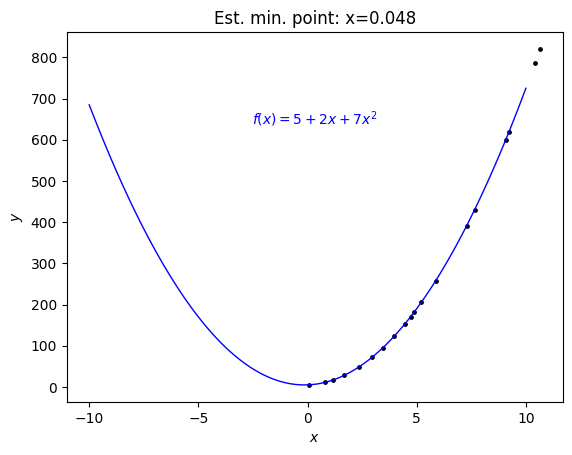

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

def func(x):
    return 5 + 2 * x + 7 * x**2

def grad_func(x):
    return 2 + 14 * x

x = np.linspace(-10, 10, 101)
y = func(x)

learning_rate = 0.01
iterations_max = 10000
tolerance = 1e-2

old_guess = 10
guesses = [old_guess]

n_epochs = iterations_max
minibatch_size = 40
n = int(len(x) / minibatch_size)

indices = np.arange(len(x))
best = np.inf
fig, ax = plt.subplots()
line, = ax.plot(x, y, lw=1, color='blue')

for i in range(n_epochs):
    rand_ind = np.random.choice(indices, size=minibatch_size,
                                replace=False)
    
    xi = x[rand_ind]
    yi = y[rand_ind]

    for j in range(n):
        grad = grad_func(xi[j])
        change = learning_rate * grad
        new_guess = old_guess - change 
        old_guess = new_guess
        
        if new_guess < best and new_guess > 0.0:
            best = new_guess
            ax.scatter(best, func(best), s=6, color='black')
        
    if new_guess < tolerance:
        print(f'Converged after {i} iterations.')
        print(f'Final estimate for minium point: x={best:.3e}')
        break

ax.set_title(f'Est. min. point: x={best:.2g}')
ax.text(0.5, 0.75, r'$f(x)=5+2x+7x^2$', transform=ax.transAxes,
        ha='center', color=line.get_color())
        
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()